**Problem 3**

Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image, the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level);

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us now load the dataset.

**Reading the datasets**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Inferential Statistics Project/Zingaro_Company.csv', encoding= 'unicode_escape')

**Data Overview**

1)Observing the first few rows of the dataset

2)Getting information about the number of rows and columns

3)Finding out the data types of the columns

4)Checking the statistical summary

In [ ]:
data.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


**Displaying the first 5 rows of the dataset**

**This data set contain information**
The dataset includes information about Polished and unpolished stons.


**Understanding the shape of the dataset**

In [ ]:
data.shape

(75, 2)

There are 75 rows and 2 columns in the dataset.

Checking the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


Both The columns Unpolished and Treate and Polished are Float Type

Getting the statistical summary for the dataset

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unpolished,75.0,134.110527,33.041804,48.406838,115.329753,135.597121,158.215098,200.161313
Treated and Polished,75.0,147.788117,15.587355,107.524167,138.268300,145.721322,157.373318,192.272856


Max value of its is 200.16  and 1922.27 and min value for unpolished is 48.40 and 107.52 for treate and polished

**Checking** null value

In [ ]:
data.isnull().sum()

,0
Unpolished,0
Treated and Polished,0


There is no any null value in data set


**3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?**

**mean hardness < 150 for unpolished stones**

We're comparing a sample mean (unpolished stones) against a population threshold (150).

**Population std dev is unknown → so t-test is appropriate**

# Hypotheses:
H0: μ = 150  #(mean hardness is 150)
H1: μ < 150 #(mean hardness is less than 150)

In [ ]:

unpolished = data['Unpolished ']


# Perform one-sample t-test (left-tailed)


In [ ]:
t_stat, p_value = stats.ttest_1samp(unpolished, popmean=150)

print("T-statistic:", t_stat)
print("P-value (one-tailed):", p_value / 2)

T-statistic: -4.164629601426757
P-value (one-tailed): 4.171286997419652e-05


**visual representation**

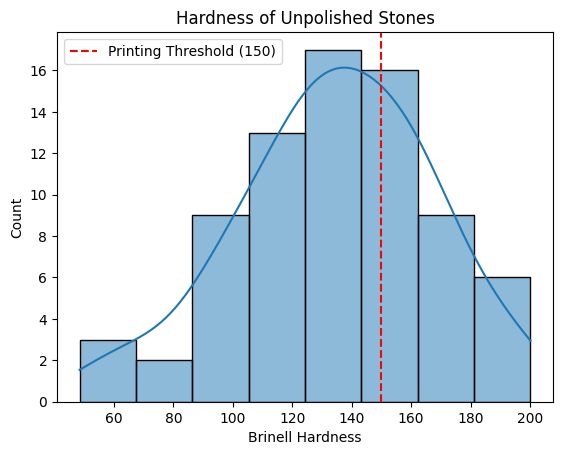

In [ ]:
sns.histplot(unpolished, kde=True)
plt.axvline(150, color='red', linestyle='--', label='Printing Threshold (150)')
plt.title("Hardness of Unpolished Stones")
plt.xlabel("Brinell Hardness")
plt.legend()
plt.show()

**Conclusion for 3.1 (Based on 5% level)**

Based on our analysis (with a 5% significance level), the p-value (4.17e-05) is much smaller than our significance level (0.05). This means we have strong evidence to reject the null hypothesis.

**Conclusion for 3.1:** It seems Zingaro's concern is justified. There's enough evidence to conclude that the average hardness of unpolished stones is indeed less than 150, making them potentially unsuitable for their printing process.

# Problem 3.2: Is the mean hardness of polished and unpolished stones the same?

Perfoming two-sample t-test

We are comparing two independent sample means (Polished vs Unpolished).

Assumption: Data comes from normal distributions; use Welch's t-test (variance not assumed equal).

In [ ]:
polished=data['Treated and Polished']
unpolished = data['Unpolished ']


Hypotheses for two-sample t-test:


H0: μ_unpolished = μ_polished (mean hardness is the same)

H1: μ_unpolished != μ_polished (mean hardness is different)

In [ ]:


t_stat_2sample, p_value_2sample = stats.ttest_ind(unpolished, polished, equal_var=False) # Welch's t-test

print("Two-sample T-statistic:", t_stat_2sample)
print("Two-sample P-value:", p_value_2sample)

Two-sample T-statistic: -3.242232050141406
Two-sample P-value: 0.001588379295584306


# Create histograms

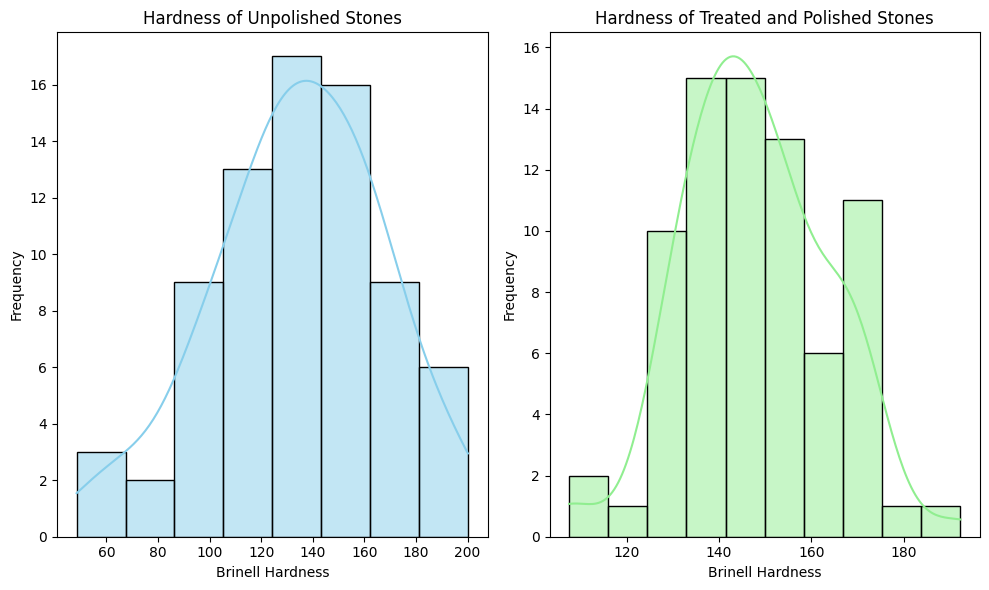

In [ ]:

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Unpolished '], kde=True, color='skyblue')
plt.title("Hardness of Unpolished Stones")
plt.xlabel("Brinell Hardness")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(data['Treated and Polished'], kde=True, color='lightgreen')
plt.title("Hardness of Treated and Polished Stones")
plt.xlabel("Brinell Hardness")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Based on the histograms, here are some conclusions you can draw:

**Unpolished Stones:** The histogram for unpolished stones appears to be more spread out, with a notable portion of stones having hardness values below the 150 threshold required for printing. The distribution seems to be somewhat skewed towards lower hardness values.

**Treated and Polished Stones:** The histogram for treated and polished stones appears to be more centered around higher hardness values, with a larger concentration of stones at or above the 150 threshold. The distribution seems less spread out than the unpolished stones.

**Conclusion for 3.2 (5% significance)**

With a p-value of 0.00158, which is well below our 5% significance level (0.05), we can confidently reject the null hypothesis.

**Conclusion for 3.2:** Yes, the statistical test shows a significant difference in the average hardness between the treated and polished stones and the unpolished stones. They are not the same.